# Preliminary exploratory data analysis and verification design

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

**File descriptions**  
 * sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
 * test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
 * sample_submission.csv - a sample submission file in the correct format.
 * items.csv - supplemental information about the items/products.
 * item_categories.csv  - supplemental information about the items categories.
 * shops.csv- supplemental information about the shops.

 **Selected data fields**  
 * ID - an Id that represents a (Shop, Item) tuple within the test set
 * shop_id - unique identifier of a shop
 * item_id - unique identifier of a product
 * item_category_id - unique identifier of item category
 * item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
 * item_price - current price of an item
 * date - date in format dd/mm/yyyy
 * date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
 * item_name - name of item
 * shop_name - name of shop
 * item_category_name - name of item category

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data loading

In [3]:
DATA_DIR = "../data/final_project/"
# sales
sales_train = pd.read_csv(DATA_DIR+"sales_train.csv")
sales_test = pd.read_csv(DATA_DIR+"test.csv")

# addional info
items = pd.read_csv(DATA_DIR+"items.csv")
item_categories = pd.read_csv(DATA_DIR+"item_categories.csv")
shops = pd.read_csv(DATA_DIR+"shops.csv")

## Data packaging

In [4]:
# lets check shapes
print("Sales train shape: {}".format(sales_train.shape))
print("Sales test shape: {}".format(sales_test.shape))
print("Items: {}".format(items.shape))
print("Item categories: {}".format(item_categories.shape))
print("Shops: {}".format(shops.shape))

Sales train shape: (2935849, 6)
Sales test shape: (214200, 3)
Items: (22170, 3)
Item categories: (84, 2)
Shops: (60, 2)


In [5]:
# lets check heads
print("Sales train")
display(sales_train.head(3))
print("Sales test")
display(sales_test.head(3))
print("Items")
display(items.head(3))
print("Item categories")
display(item_categories.head(3))
print("Shops")
display(shops.head(3))

Sales train


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


Sales test


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233


Items


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40


Item categories


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2


Shops


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2


In [6]:
# missing values
print("Sales train")
display(sales_train.isnull().sum())
print("Sales test")
display(sales_test.isnull().sum())
print("Items")
display(items.isnull().sum())
print("Item categories")
display(item_categories.isnull().sum())
print("Shops")
display(shops.isnull().sum())

Sales train


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

Sales test


ID         0
shop_id    0
item_id    0
dtype: int64

Items


item_name           0
item_id             0
item_category_id    0
dtype: int64

Item categories


item_category_name    0
item_category_id      0
dtype: int64

Shops


shop_name    0
shop_id      0
dtype: int64

In [7]:
# data types
print("Sales train")
display(sales_train.dtypes)
print("Sales test")
display(sales_test.dtypes)
print("Items")
display(items.dtypes)
print("Item categories")
display(item_categories.dtypes)
print("Shops")
display(shops.dtypes)

Sales train


date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

Sales test


ID         int64
shop_id    int64
item_id    int64
dtype: object

Items


item_name           object
item_id              int64
item_category_id     int64
dtype: object

Item categories


item_category_name    object
item_category_id       int64
dtype: object

Shops


shop_name    object
shop_id       int64
dtype: object

In [8]:
# test coverage
print("Shop coverage on test {}".format(sales_test.shop_id.isin(sales_train.shop_id).sum()/sales_test.shape[0]))
print("Item coverage on test {}".format(sales_test.item_id.isin(sales_train.item_id).sum()/sales_test.shape[0]))

Shop coverage on test 1.0
Item coverage on test 0.9288235294117647


In [9]:
missing_items = sales_test.item_id[np.logical_not(sales_test.item_id.isin(sales_train.item_id))]
items[items.item_id.isin(missing_items)]

,item_name,item_id,item_category_id
83,12/ДВЕНАДЦАТЬ (СР) (Регион),83,40
140,1С:Аудиокниги. Аладдин и другие восточные сказ...,140,45
168,1С:Аудиокниги. Аудиокурсы по географии. 6 клас...,168,44
173,1С:Аудиокниги. Аудиоэнциклопедия для самых мал...,173,45
204,"1С:Аудиокниги. Г.Р. Хаггард. Клеопатра [PC, Ци...",204,44
...,...,...,...
21974,"Шарф Doctor Who Tardis синий 1,6м",21974,61
21975,Шарф Doctor Who цветной 2м,21975,61
22022,ЭКИПАЖ (rem),22022,40
22035,ЭЛВИН И БУРУНДУКИ 2,22035,40


In [10]:
items[items.item_id.isin(missing_items)].item_category_id.value_counts().head(10)

40    71
55    38
72    28
31    25
47    22
58    21
20    18
65    12
25    12
61    11
Name: item_category_id, dtype: int64

## Data conversion & transformations

In [11]:
# time feats
sales_train["date"] = pd.to_datetime(sales_train.date, format="%d.%m.%Y")
sales_train["month"] = sales_train.date.dt.month
sales_train["year"] = sales_train.date.dt.year
sales_train["revenue"] = sales_train.item_price*sales_train.item_cnt_day

sales_test["date"] = pd.to_datetime("2015/11/01")
sales_test["month"] = sales_test.date.dt.month
sales_test["year"] = sales_test.date.dt.year
sales_test["date_block_num"] = 34

In [12]:
# build category hierarchy
cats = item_categories.item_category_name.str.split("-")
item_categories["parent"] = cats.apply(lambda x: x[0])
item_categories["child"] = np.nan
item_categories["child"][cats.apply(len)>1] = cats[cats.apply(len)>1].apply(lambda x: x[1])
# possibly vector encoding?

# add city
shops["city"] = shops['shop_name'].apply(lambda x: x.split()[0].replace("!",""))

/tmp/ipykernel_18249/1575197040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_categories["child"][cats.apply(len)>1] = cats[cats.apply(len)>1].apply(lambda x: x[1])


## Preliminary exploration

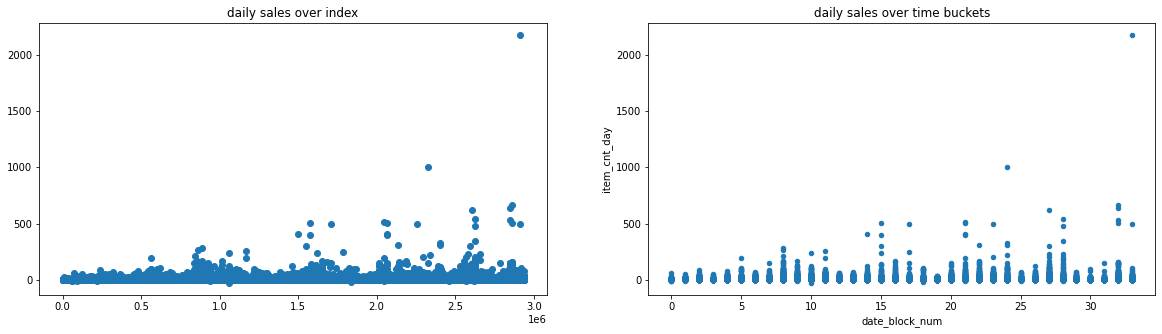

In [13]:
# day changes over index and time
fig, axs = plt.subplots(1,2, figsize=(20,5))
axs[0].set_title("daily sales over index")
axs[0].scatter(x=sales_train.index, y=sales_train.item_cnt_day);
axs[1].set_title("daily sales over time buckets")
sales_train.plot(kind="scatter", x="date_block_num", y="item_cnt_day", ax=axs[1]);

In [14]:
sales_wide = sales_train.merge(items, left_on="item_id", right_on="item_id").\
    merge(item_categories, left_on="item_category_id", right_on="item_category_id").\
        merge(shops, left_on="shop_id", right_on="shop_id")

# construct aggregated sales
agg_sales = sales_wide[sales_wide.shop_id.isin(sales_test.shop_id)].\
    groupby(["year", "month", "shop_id", "item_id", "item_category_id", "city"], as_index=False).agg(
    date_block_num=("date_block_num", np.mean),
    cnt_item=("item_cnt_day",sum),
    avg_price=("item_price",np.mean),
    min_price=("item_price",np.min),
    max_price=("item_price",np.max),
    var_price=("item_price",np.var),
    sum_revenue=("revenue",sum))

# check the distributions
agg_sales.describe(percentiles=[.001,.5,.75,.999]).T    

,count,mean,std,min,0.1%,50%,75%,99.9%,max
year,1323795.0,2013.836890,0.790685,2013.00,2013.00,2014.0,2014.0,2.015000e+03,2.015000e+03
month,1323795.0,6.223134,3.419644,1.00,1.00,6.0,9.0,1.200000e+01,1.200000e+01
shop_id,1323795.0,32.128938,16.787155,2.00,2.00,31.0,46.0,5.900000e+01,5.900000e+01
item_id,1323795.0,10617.296492,6242.701713,1.00,32.00,10393.0,16031.0,2.214300e+04,2.216900e+04
item_category_id,1323795.0,41.369747,16.409094,0.00,2.00,40.0,55.0,8.300000e+01,8.300000e+01
date_block_num,1323795.0,15.265816,9.662895,0.00,0.00,15.0,23.0,3.300000e+01,3.300000e+01
cnt_item,1323795.0,2.258968,8.756585,-22.00,0.00,1.0,2.0,7.500000e+01,2.253000e+03
avg_price,1323795.0,808.109842,1589.724987,0.09,0.99,399.0,899.0,2.299000e+04,3.079800e+05
min_price,1323795.0,800.299799,1571.241861,0.07,0.50,399.0,899.0,2.299000e+04,3.079800e+05
max_price,1323795.0,816.840738,1612.097451,0.09,0.99,399.0,899.0,2.299000e+04,3.079800e+05


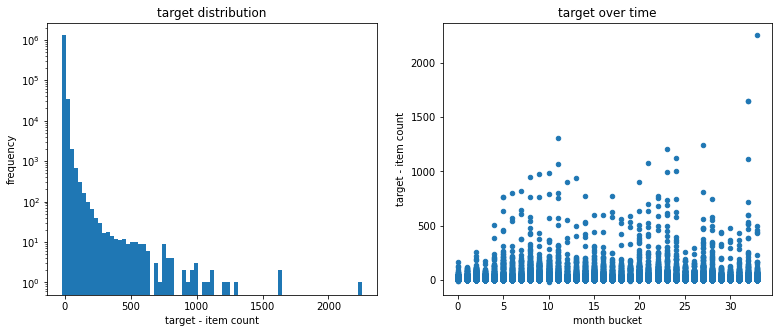

In [15]:
fig, axs = plt.subplots(1,2, figsize=(13,5))

axs[0].set_title("target distribution");
agg_sales.cnt_item.plot(kind="hist", bins=75, logy=True, ax=axs[0]);
axs[0].set_ylabel("frequency");axs[0].set_xlabel("target - item count");

axs[1].set_title("target over time");
agg_sales.plot(kind="scatter", x="date_block_num", y="cnt_item", ax=axs[1]);
axs[1].set_ylabel("target - item count");axs[1].set_xlabel("month bucket");

In [16]:
# shops
agg_shops = agg_sales.groupby(["shop_id"], as_index=False).agg(
    cnt_item=("cnt_item",sum),
    dcnt_item=("item_id", pd.Series.nunique),
    dcnt_cat=("item_category_id", pd.Series.nunique))
agg_shops["avg_cnt_item"] = agg_shops.cnt_item/agg_shops.dcnt_item
agg_shops["avg_cnt_item"] = agg_shops.cnt_item/agg_shops.dcnt_cat
agg_shops.sort_values("cnt_item", ascending=False).head(5)

,shop_id,cnt_item,dcnt_item,dcnt_cat,avg_cnt_item
19,31,310777.0,14416,62,5012.532258
16,25,241920.0,15367,65,3721.846154
18,28,184557.0,12572,60,3075.950000
27,42,144934.0,12034,62,2337.645161
39,57,141107.0,12281,61,2313.229508


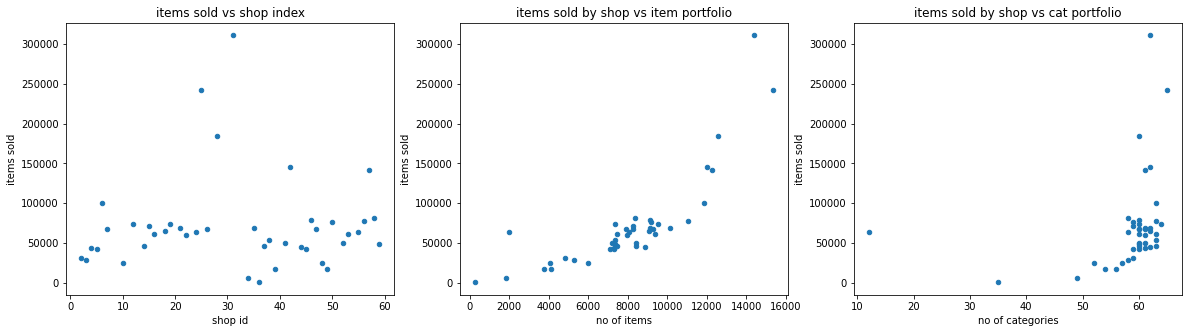

In [17]:
fig, axs = plt.subplots(1,3, figsize=(20,5))

axs[0].set_title("items sold vs shop index");
agg_shops.plot(kind="scatter", x="shop_id",y="cnt_item", ax=axs[0]);
axs[0].set_ylabel("items sold");axs[0].set_xlabel("shop id");

axs[1].set_title("items sold by shop vs item portfolio");
agg_shops.plot(kind="scatter", x="dcnt_item",y="cnt_item", ax=axs[1]);
axs[1].set_ylabel("items sold");axs[1].set_xlabel("no of items");

axs[2].set_title("items sold by shop vs cat portfolio");
agg_shops.plot(x="dcnt_cat",y="cnt_item",kind="scatter", ax=axs[2]);
axs[2].set_ylabel("items sold");axs[2].set_xlabel("no of categories");

In [18]:
# best and worst products
agg_products = agg_sales.groupby("item_id", as_index=False).agg(
    cnt_item=("cnt_item", sum),
    ncnt_item=("cnt_item","count"),
    avg_month_item=("cnt_item", np.mean),
    dcnt_shop=("shop_id", pd.Series.nunique)).\
        sort_values("cnt_item", ascending=False)

display(agg_products.head(5))
display(agg_products.tail(5))

,item_id,cnt_item,ncnt_item,avg_month_item,dcnt_shop
19981,20949,154077.0,1125,136.957333,41
2637,2808,13955.0,1127,12.382431,41
3524,3732,13582.0,882,15.399093,41
16906,17717,13553.0,943,14.372216,39
5518,5822,12268.0,1236,9.925566,41


,item_id,cnt_item,ncnt_item,avg_month_item,dcnt_shop
8095,8515,-1.0,1,-1.0,1
17240,18062,-1.0,1,-1.0,1
11318,11871,-1.0,1,-1.0,1
12831,13474,-1.0,1,-1.0,1
1476,1590,-12.0,4,-3.0,1


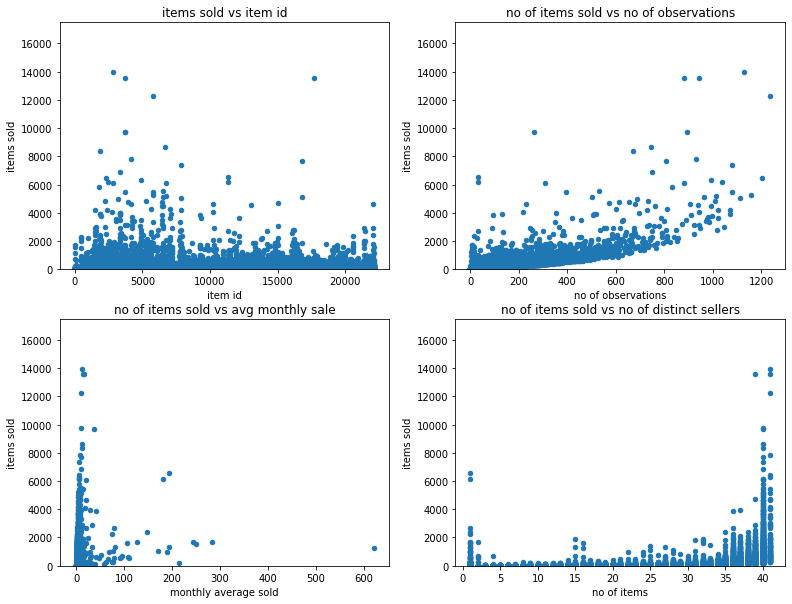

In [19]:
fig, axs = plt.subplots(2,2, figsize=(13,10))

axs[0,0].set_title("items sold vs item id");
agg_products.plot(kind="scatter", x="item_id",y="cnt_item", ylim=(-5,17500), ax=axs[0,0]);
axs[0,0].set_ylabel("items sold");axs[0,0].set_xlabel("item id");

axs[0,1].set_title("no of items sold vs no of observations");
agg_products.plot(kind="scatter", x="ncnt_item",y="cnt_item", ylim=(-5,17500), ax=axs[0,1]);
axs[0,1].set_ylabel("items sold");axs[0,1].set_xlabel("no of observations");

axs[1,0].set_title("no of items sold vs avg monthly sale");
agg_products.plot(kind="scatter", x="avg_month_item",y="cnt_item", ylim=(-5,17500), ax=axs[1,0]);
axs[1,0].set_ylabel("items sold");axs[1,0].set_xlabel("monthly average sold");

axs[1,1].set_title("no of items sold vs no of distinct sellers");
agg_products.plot(kind="scatter", x="dcnt_shop",y="cnt_item", ylim=(-5,17500), ax=axs[1,1]);
axs[1,1].set_ylabel("items sold");axs[1,1].set_xlabel("no of items");


In [20]:
# categories
agg_cats = agg_sales.groupby(["item_category_id"], as_index=False).agg(
    cnt_item=("cnt_item",sum),
    ncnt_item=("cnt_item","count"),
    dcnt_item=("item_id", pd.Series.nunique),
    rev_item=("sum_revenue",sum),
    dcnt_shop=("shop_id", pd.Series.nunique)).\
        sort_values("cnt_item")
agg_cats["avg_price"] = agg_cats.rev_item/agg_cats.cnt_item
display(agg_cats.head(5))
display(agg_cats.tail(5))

,item_category_id,cnt_item,ncnt_item,dcnt_item,rev_item,dcnt_shop,avg_price
1,1,1.0,1,1,148.0,1,148.000000
51,51,1.0,1,1,129.0,1,129.000000
10,10,1.0,1,1,1998.0,1,1998.000000
0,0,2.0,2,2,170.4,2,85.200000
50,50,3.0,2,2,58.0,1,19.333333


,item_category_id,cnt_item,ncnt_item,dcnt_item,rev_item,dcnt_shop,avg_price
37,37,166495.0,111221,1758,7.379375e+07,41,443.219024
19,19,209797.0,80406,615,3.383028e+08,41,1612.524330
55,55,285622.0,203998,2220,8.315538e+07,41,291.137880
30,30,380392.0,109629,726,2.171324e+08,41,570.812188
40,40,504517.0,269196,4827,1.366167e+08,41,270.787047


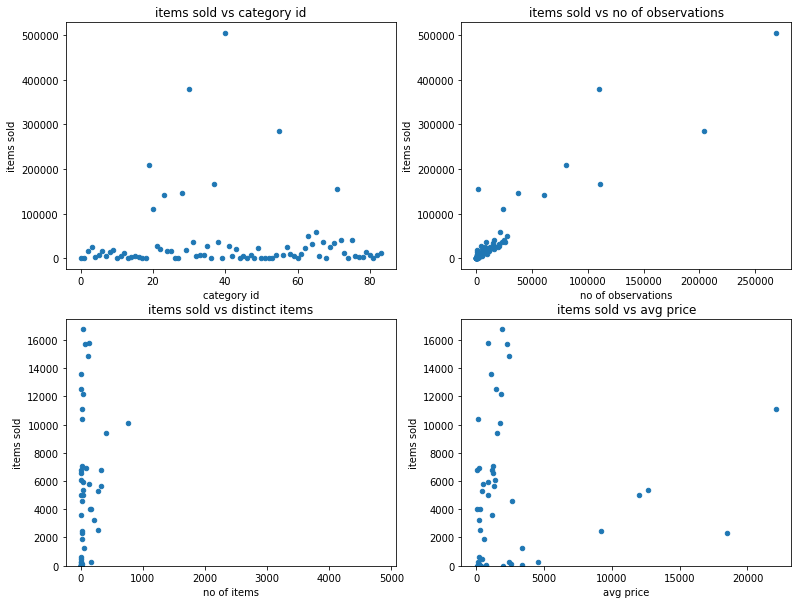

In [21]:
fig, axs = plt.subplots(2,2, figsize=(13,10))

axs[0,0].set_title("items sold vs category id");
agg_cats.plot(kind="scatter", x="item_category_id",y="cnt_item", ax=axs[0,0]);
axs[0,0].set_ylabel("items sold");axs[0,0].set_xlabel("category id");

axs[0,1].set_title("items sold vs no of observations");
agg_cats.plot(kind="scatter", x="ncnt_item",y="cnt_item", ax=axs[0,1]);
axs[0,1].set_ylabel("items sold");axs[0,1].set_xlabel("no of observations");

axs[1,0].set_title("items sold vs distinct items");
agg_cats.plot(kind="scatter", x="dcnt_item",y="cnt_item", ylim=(-5,17500), ax=axs[1,0]);
axs[1,0].set_ylabel("items sold");axs[1,0].set_xlabel("no of items");

axs[1,1].set_title("items sold vs avg price");
agg_cats.plot(kind="scatter", x="avg_price",y="cnt_item", ylim=(-5,17500), ax=axs[1,1]);
axs[1,1].set_ylabel("items sold");axs[1,1].set_xlabel("avg price");

In [22]:
# cities
agg_cities = agg_sales.groupby(["city"], as_index=False).agg(
    cnt_item=("cnt_item",sum),
    ncnt_item=("cnt_item","count"),
    dcnt_item=("item_id", pd.Series.nunique),
    rev_item=("sum_revenue",sum),
    dcnt_cat=("item_category_id", pd.Series.nunique)).\
        sort_values("cnt_item")
agg_cities["avg_price"] = agg_cities.rev_item/agg_cities.cnt_item        
display(agg_cities.head(5))
display(agg_cities.tail(5))

,city,cnt_item,ncnt_item,dcnt_item,rev_item,dcnt_cat,avg_price
5,Жуковский,24523.0,14917,6002,1.941028e+07,57,791.513411
21,Томск,24909.0,13580,4063,2.771411e+07,52,1112.614317
1,Балашиха,28355.0,16827,5261,3.014085e+07,58,1062.981974
0,Адыгея,30620.0,15553,4849,4.404964e+07,59,1438.590425
3,Вологда,42762.0,24108,7084,3.816043e+07,60,892.391119


,city,cnt_item,ncnt_item,dcnt_item,rev_item,dcnt_cat,avg_price
23,Уфа,111401.0,58021,9995,1.015653e+08,62,911.708902
17,СПб,144934.0,56861,12034,1.519170e+08,62,1048.180776
4,Воронеж,167547.0,79950,12756,1.650251e+08,63,984.948178
26,Якутск,222841.0,97926,12736,1.817374e+08,61,815.547414
12,Москва,997820.0,374934,17361,8.708270e+08,67,872.729539


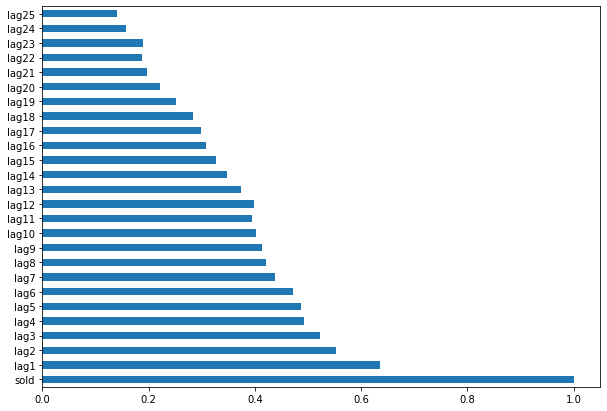

In [23]:
# auto correlation with lags 
im_sales = agg_sales.groupby(["date_block_num","shop_id","item_id"], as_index=False)\
    .agg(sold=("cnt_item", sum))\
        .sort_values("date_block_num")
lags = range(1,26)
lag_series = []
for l in lags:
    lag_series.append(im_sales.groupby(["shop_id","item_id"], as_index=False).sold.shift(l))
lag_sales = pd.concat(lag_series, axis=1).fillna(0)
lag_sales.columns = ["lag"+str(l) for l in lags]
lag_sales = pd.concat([im_sales, lag_sales], axis=1)
fig, ax = plt.subplots(1,1, figsize=(10,7))
lag_sales.loc[:,"sold":"lag25"].corr()["sold"].head(26).plot(kind="barh", ax=ax);

## Verification design

Benchmark based on tree naive strategies - (1) sales on target same as the last month, (2) median target over observation period and (3) gbm on base dataset.

Avg RMSE for the first strategy: 6.5925871900088975
Std RMSE for the first strategy: 3.216837897941121


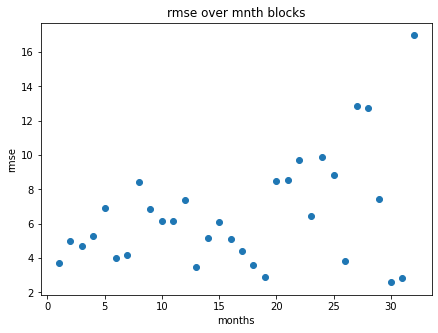

In [24]:
rmse_list = []
for target_block in range(1,33):
    # get prediction for target block
    predicted_values = agg_sales[agg_sales.date_block_num==(target_block-1)][["shop_id", "item_id","cnt_item"]]
    observed_values = agg_sales[agg_sales.date_block_num==target_block][["shop_id","item_id","cnt_item"]]
    bench = observed_values.merge(predicted_values, on=["shop_id","item_id"],
        how="left", suffixes=["_obs","_pred"]).fillna(1) # hack 
    bench["se"] = (bench.cnt_item_pred-bench.cnt_item_obs)**2
    rmse_list.append(bench["se"].mean()**(1/2))

fig, ax = plt.subplots(1,1, figsize=(7,5))
plt.scatter(x=range(1,33),y=rmse_list);
ax.set_title("rmse over mnth blocks");ax.set_xlabel("months");ax.set_ylabel("rmse");
print("Avg RMSE for the first strategy: {}".format(np.mean(rmse_list)))
print("Std RMSE for the first strategy: {}".format(np.std(rmse_list)))

In [25]:
# the biggest fails
bench.sort_values("se").tail(10)

,shop_id,item_id,cnt_item_obs,cnt_item_pred,se
10459,25,9250,208.0,28.0,32400.0
26049,55,9255,539.0,71.0,219024.0
4106,12,9252,516.0,14.0,252004.0
26048,55,9253,516.0,14.0,252004.0
26045,55,9247,716.0,157.0,312481.0
26044,55,9245,597.0,29.0,322624.0
4104,12,9244,597.0,29.0,322624.0
26047,55,9251,1117.0,193.0,853776.0
4105,12,9248,1644.0,19.0,2640625.0
26046,55,9249,1644.0,19.0,2640625.0


Avg RMSE for the second strategy: 6.984793849810235
Std RMSE for the second strategy: 3.073450957317647


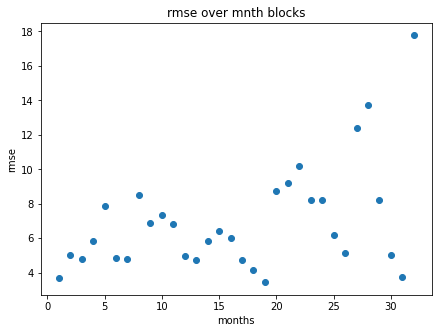

In [26]:
rmse_list = []
for target_block in range(1,33):
    # get prediction for target block
    predicted_values = agg_sales[agg_sales.date_block_num<target_block].groupby(["shop_id", "item_id"],
        as_index=False).cnt_item.median()

    observed_values = agg_sales[agg_sales.date_block_num==target_block][["shop_id","item_id","cnt_item"]]
    bench = observed_values.merge(predicted_values, on=["shop_id","item_id"],
        how="left", suffixes=["_obs","_pred"]).fillna(1) #hack
    bench["se"] = (bench.cnt_item_pred-bench.cnt_item_obs)**2
    rmse_list.append(bench["se"].mean()**(1/2))

fig, ax = plt.subplots(1,1, figsize=(7,5))
plt.scatter(x=range(1,33),y=rmse_list);
ax.set_title("rmse over mnth blocks");ax.set_xlabel("months");ax.set_ylabel("rmse");
print("Avg RMSE for the second strategy: {}".format(np.mean(rmse_list)))
print("Std RMSE for the second strategy: {}".format(np.std(rmse_list)))

In [27]:
# the biggest fails
bench.sort_values("se").tail(10)

,shop_id,item_id,cnt_item_obs,cnt_item_pred,se
13467,28,20949,237.0,493.0,65536.0
4106,12,9252,516.0,3.0,263169.0
26048,55,9253,516.0,3.0,263169.0
26049,55,9255,539.0,16.0,273529.0
4104,12,9244,597.0,6.0,349281.0
26044,55,9245,597.0,6.0,349281.0
26045,55,9247,716.0,47.0,447561.0
26047,55,9251,1117.0,50.0,1138489.0
26046,55,9249,1644.0,13.0,2660161.0
4105,12,9248,1644.0,12.0,2663424.0


Avg RMSE for the second strategy: 6.984793849810235
Std RMSE for the second strategy: 3.073450957317647


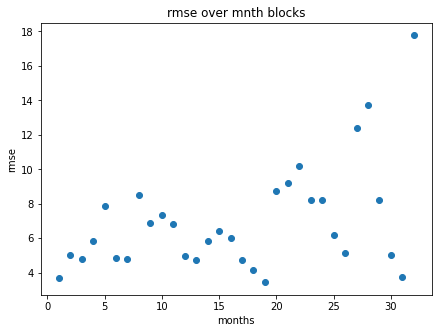

In [28]:
rmse_list = []
for target_block in range(1,33):
    # get prediction for target block
    predicted_values = agg_sales[agg_sales.date_block_num<target_block].groupby(["shop_id", "item_id"],
        as_index=False).cnt_item.median()

    observed_values = agg_sales[agg_sales.date_block_num==target_block][["shop_id","item_id","cnt_item"]]
    bench = observed_values.merge(predicted_values, on=["shop_id","item_id"],
        how="left", suffixes=["_obs","_pred"]).fillna(1) #hack
    bench["se"] = (bench.cnt_item_pred-bench.cnt_item_obs)**2
    rmse_list.append(bench["se"].mean()**(1/2))

fig, ax = plt.subplots(1,1, figsize=(7,5))
plt.scatter(x=range(1,33),y=rmse_list);
ax.set_title("rmse over mnth blocks");ax.set_xlabel("months");ax.set_ylabel("rmse");
print("Avg RMSE for the second strategy: {}".format(np.mean(rmse_list)))
print("Std RMSE for the second strategy: {}".format(np.std(rmse_list)))

Avg RMSE for the third strategy: 6.123145700211758
Std RMSE for the third strategy: 3.0262873391367533


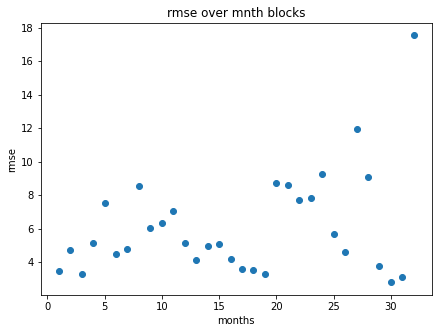

In [38]:
from lightgbm import LGBMRegressor
rmse_list = []
for target_block in range(1,33):
    train_values = agg_sales[agg_sales.date_block_num<target_block]\
        [["year","month","date_block_num","shop_id","item_id","item_category_id", "cnt_item"]].copy()
    train_values.rename(columns={"cnt_item":"target"}, inplace=True)
    test_values = agg_sales[agg_sales.date_block_num==target_block]\
        [["year","month","date_block_num","shop_id","item_id","item_category_id","cnt_item"]].copy()
    test_values.rename(columns={"cnt_item":"target"}, inplace=True)    

    gbm = LGBMRegressor()
    ff = [c != "target" for c in train_values.columns]
    gbm.fit(train_values.loc[:,ff], train_values.target)
    target_pred=gbm.predict(test_values.loc[:,ff])
    se = (test_values.target-target_pred)**2
    rmse_list.append(se.mean()**(1/2))

fig, ax = plt.subplots(1,1, figsize=(7,5))
plt.scatter(x=range(1,33),y=rmse_list);
ax.set_title("rmse over mnth blocks");ax.set_xlabel("months");ax.set_ylabel("rmse");
print("Avg RMSE for the third strategy: {}".format(np.mean(rmse_list)))
print("Std RMSE for the third strategy: {}".format(np.std(rmse_list)))